<a href="https://colab.research.google.com/github/NelluriLokesh/Decision-Tree-Project---Price-Prediction-of-Used-Cars/blob/main/Decision_Tree_Project_Price_Prediction_of_Used_Cars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Steps

1. Import libraries
2. Import the dataset
3. Perform Data Analysis & EDA
4. Spliting the data
5. [Optional] Data Preprocessing - Feature Scaling,...
6. Choosing a model - Decision Tree Regressor
7. Training the model
8. Testing the model
9. Checking the performance of the model

# Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

#Problem Statement

Used Car Price Prediction with Decision Trees.
Develop a model that predicts the selling price of used cars using the Decision Tree algorithm. The model will be trained on a dataset containing car attributes like make, model, year, mileage, and more. The aim is to create an accurate and interpretable tool for buyers and sellers in the used car market, enabling fair pricing decisions based on key features.

# Importing the dataset

Link: https://raw.githubusercontent.com/sahilrahman12/Price_prediction_of_used_Cars_-Predictive_Analysis-/master/car_data.csv

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/sahilrahman12/Price_prediction_of_used_Cars_-Predictive_Analysis-/master/car_data.csv')

# Data Analysis & EDA

In [ ]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [ ]:
data.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner
4339,Renault KWID RXT,2016,225000,40000,Petrol,Individual,Manual,First Owner


In [ ]:
data.ndim

2

In [ ]:
data.shape

(4340, 8)

In [ ]:
data.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [ ]:
data.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [ ]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [ ]:
data.fuel.unique()

array(['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric'], dtype=object)

In [ ]:
data.seller_type.unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [ ]:
data.transmission.unique()

array(['Manual', 'Automatic'], dtype=object)

In [ ]:
data.owner.unique()

array(['First Owner', 'Second Owner', 'Fourth & Above Owner',
       'Third Owner', 'Test Drive Car'], dtype=object)

In [ ]:
new_data = data.copy()

In [ ]:
print(new_data.head(10))

                        name  year  selling_price  km_driven    fuel  \
0              Maruti 800 AC  2007          60000      70000  Petrol   
1   Maruti Wagon R LXI Minor  2007         135000      50000  Petrol   
2       Hyundai Verna 1.6 SX  2012         600000     100000  Diesel   
3     Datsun RediGO T Option  2017         250000      46000  Petrol   
4      Honda Amaze VX i-DTEC  2014         450000     141000  Diesel   
5       Maruti Alto LX BSIII  2007         140000     125000  Petrol   
6  Hyundai Xcent 1.2 Kappa S  2016         550000      25000  Petrol   
7   Tata Indigo Grand Petrol  2014         240000      60000  Petrol   
8   Hyundai Creta 1.6 VTVT S  2015         850000      25000  Petrol   
9   Maruti Celerio Green VXI  2017         365000      78000     CNG   

  seller_type transmission         owner  
0  Individual       Manual   First Owner  
1  Individual       Manual   First Owner  
2  Individual       Manual   First Owner  
3  Individual       Manual   First 

 Create a column new_seller_type and place it at index of the seller_type column

In [ ]:
# Replace the values:
# Individual - 0
# Dealer - 1
# Trustmark Dealer - 2

x = data.seller_type.replace({"Individual":0,"Dealer":1,"Trustmark Dealer":2})
new_data.insert(data.columns.get_loc("seller_type"),'new_seller_type',x)

In [ ]:
print(new_data.head())

                       name  year  selling_price  km_driven    fuel  \
0             Maruti 800 AC  2007          60000      70000  Petrol   
1  Maruti Wagon R LXI Minor  2007         135000      50000  Petrol   
2      Hyundai Verna 1.6 SX  2012         600000     100000  Diesel   
3    Datsun RediGO T Option  2017         250000      46000  Petrol   
4     Honda Amaze VX i-DTEC  2014         450000     141000  Diesel   

   new_seller_type seller_type transmission         owner  
0                0  Individual       Manual   First Owner  
1                0  Individual       Manual   First Owner  
2                0  Individual       Manual   First Owner  
3                0  Individual       Manual   First Owner  
4                0  Individual       Manual  Second Owner  


Create a column new_fuel and place it at index of the fuel column

In [ ]:
# Replace the values:
# Petrol - 0
# Diesel - 1
# CNG - 2
# LPG - 3
# Electric - 4
x = data['fuel'].replace({'Petrol':0,'Diesel':1,'CNG':2,'LPG':3,"Electric":4})
new_data.insert(4,'New_fuel',x)

In [ ]:
print(new_data.head())

                       name  year  selling_price  km_driven  New_fuel    fuel  \
0             Maruti 800 AC  2007          60000      70000         0  Petrol   
1  Maruti Wagon R LXI Minor  2007         135000      50000         0  Petrol   
2      Hyundai Verna 1.6 SX  2012         600000     100000         1  Diesel   
3    Datsun RediGO T Option  2017         250000      46000         0  Petrol   
4     Honda Amaze VX i-DTEC  2014         450000     141000         1  Diesel   

   new_seller_type seller_type transmission         owner  
0                0  Individual       Manual   First Owner  
1                0  Individual       Manual   First Owner  
2                0  Individual       Manual   First Owner  
3                0  Individual       Manual   First Owner  
4                0  Individual       Manual  Second Owner  


Check the new_data columns

In [ ]:
new_data.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'New_fuel', 'fuel',
       'new_seller_type', 'seller_type', 'transmission', 'owner'],
      dtype='object')

Creat a new dataframe with only fuel

In [ ]:
new_df = new_data['fuel']

In [ ]:
new_df

0       Petrol
1       Petrol
2       Diesel
3       Petrol
4       Diesel
         ...  
4335    Diesel
4336    Diesel
4337    Petrol
4338    Diesel
4339    Petrol
Name: fuel, Length: 4340, dtype: object

Check whether the fuel type.. it is the form of dataframe or series

In [ ]:
type(new_df)

pandas.core.series.Series

Create a new DataFrame using with 'fuel' and 'seller_type' columns

In [ ]:
new_ddf = new_data[['fuel','seller_type']]

In [ ]:
new_ddf

,fuel,seller_type
0,Petrol,Individual
1,Petrol,Individual
2,Diesel,Individual
3,Petrol,Individual
4,Diesel,Individual
...,...,...
4335,Diesel,Individual
4336,Diesel,Individual
4337,Petrol,Individual
4338,Diesel,Individual


In [ ]:
data

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [ ]:
# copy the data into the A_data
A_data = data.copy()

In [ ]:
A_data

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


Using label encoder change all the values in the "fuel",'seller_type', 'transmission',
'owner' into numeric to prediction from machine Learning

In [ ]:
# using Lable uncoder
from sklearn.preprocessing import LabelEncoder

In [ ]:
A_data['fuel'] = LabelEncoder().fit_transform(A_data['fuel'])
A_data['seller_type'] = LabelEncoder().fit_transform(A_data['seller_type'])
A_data['transmission'] = LabelEncoder().fit_transform(A_data['transmission'])
A_data['owner'] = LabelEncoder().fit_transform(A_data['owner'])

In [ ]:
A_data

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,4,1,1,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,4,1,1,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,1,1,0
3,Datsun RediGO T Option,2017,250000,46000,4,1,1,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,1,1,2
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,1,1,1,2
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,1,1,1,2
4337,Maruti 800 AC BSIII,2009,110000,83000,4,1,1,2
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,1,1,1,0


Create a new column "Car_age" where Car_age = current year - year.
That column should show the Car age

In [ ]:
## Set the current year
current_year = 2023

In [ ]:
A_data['Car_age'] = current_year - A_data['year']

In [ ]:
A_data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,Car_age
0,Maruti 800 AC,2007,60000,70000,4,1,1,0,16
1,Maruti Wagon R LXI Minor,2007,135000,50000,4,1,1,0,16
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,1,1,0,11
3,Datsun RediGO T Option,2017,250000,46000,4,1,1,0,6
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,1,1,2,9


Delection and rename the columns

In [ ]:
# Drop columns - name, year
# Rename selling_price to current_selling_price
A_data.drop(['name','year'],axis=1,inplace=True)
A_data.rename(columns={'selling_price':'current_selling_Price'},inplace=True)

In [ ]:
A_data.head()

,current_selling_Price,km_driven,fuel,seller_type,transmission,owner,Car_age
0,60000,70000,4,1,1,0,16
1,135000,50000,4,1,1,0,16
2,600000,100000,1,1,1,0,11
3,250000,46000,4,1,1,0,6
4,450000,141000,1,1,1,2,9


In [ ]:
A_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   current_selling_year  4340 non-null   int64
 1   km_driven             4340 non-null   int64
 2   fuel                  4340 non-null   int32
 3   seller_type           4340 non-null   int32
 4   transmission          4340 non-null   int32
 5   owner                 4340 non-null   int32
 6   Car_age               4340 non-null   int64
dtypes: int32(4), int64(3)
memory usage: 169.7 KB


Correlation

In [ ]:
A_data.corr()

,current_selling_year,km_driven,fuel,seller_type,transmission,owner,Car_age
current_selling_year,1.000000,-0.192289,-0.269653,-0.151554,-0.530205,-0.207840,-0.413922
km_driven,-0.192289,1.000000,-0.286095,0.113689,0.120226,0.297115,0.419688
fuel,-0.269653,-0.286095,1.000000,0.038797,0.039249,-0.010910,0.120002
seller_type,-0.151554,0.113689,0.038797,1.000000,0.174925,0.165681,0.098352
transmission,-0.530205,0.120226,0.039249,0.174925,1.000000,0.078893,0.143800
owner,-0.207840,0.297115,-0.010910,0.165681,0.078893,1.000000,0.414705
Car_age,-0.413922,0.419688,0.120002,0.098352,0.143800,0.414705,1.000000


Correlation on Heatmap

<Axes: >

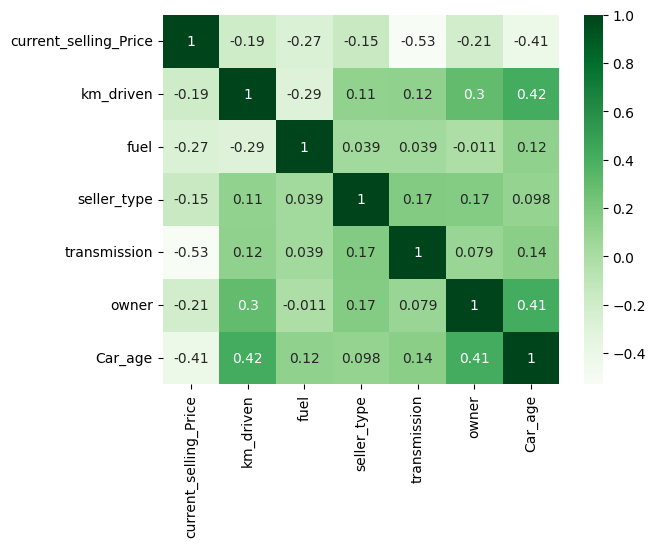

In [ ]:
sns.heatmap(A_data.corr(), annot=True, cmap='Greens')

Pair Plot

c:\Users\ABC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


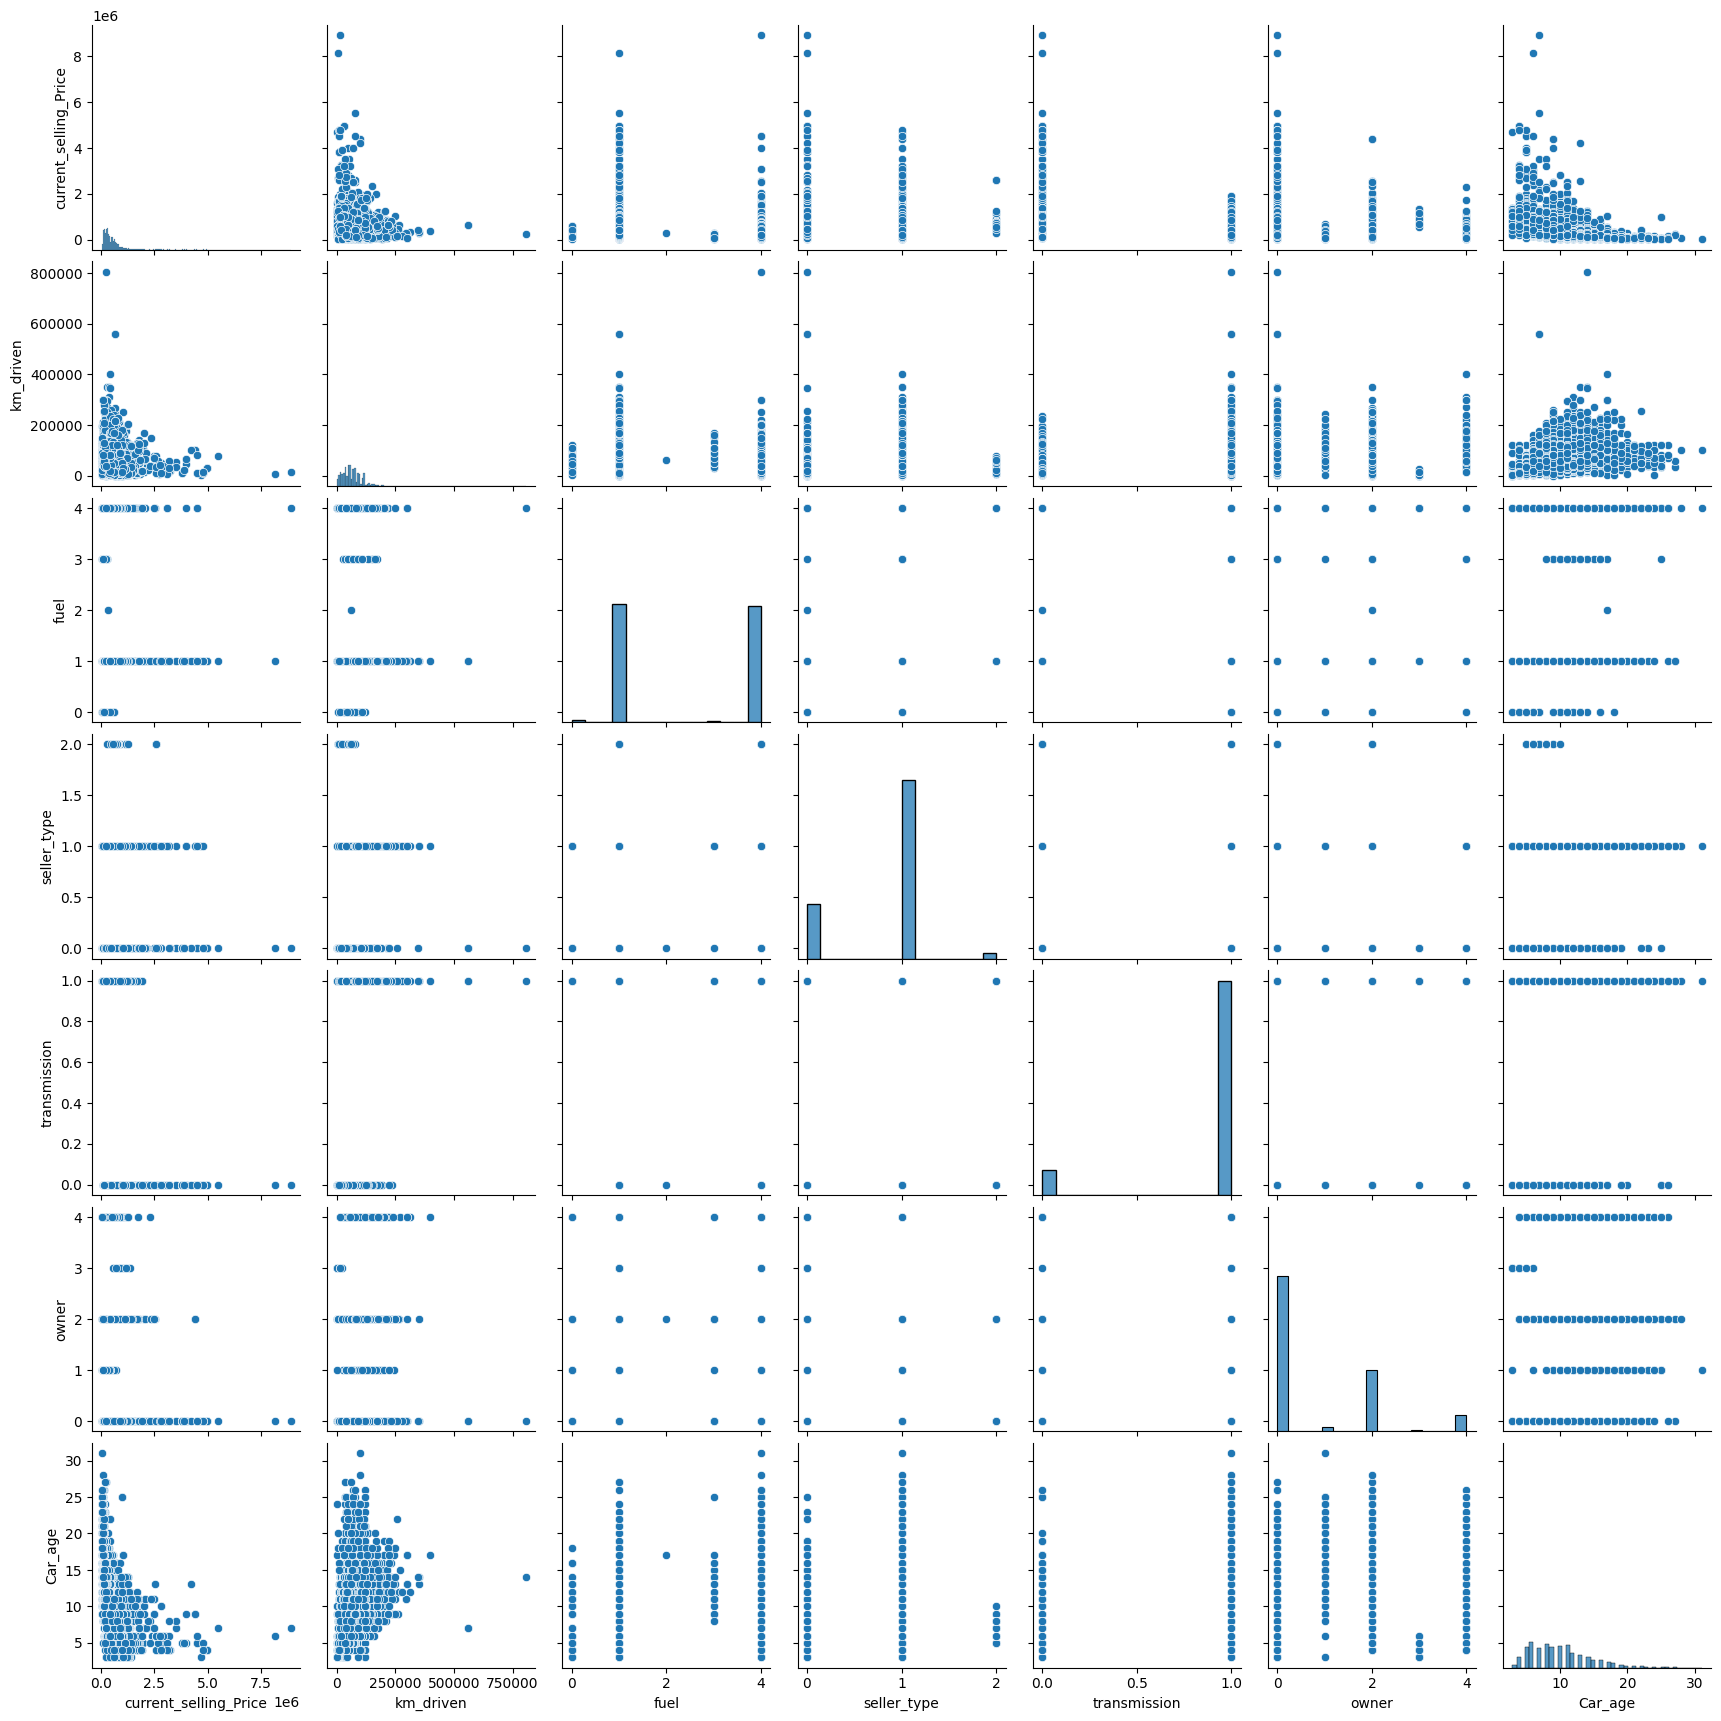

In [ ]:
sns.pairplot(A_data)

box plot

<Axes: >

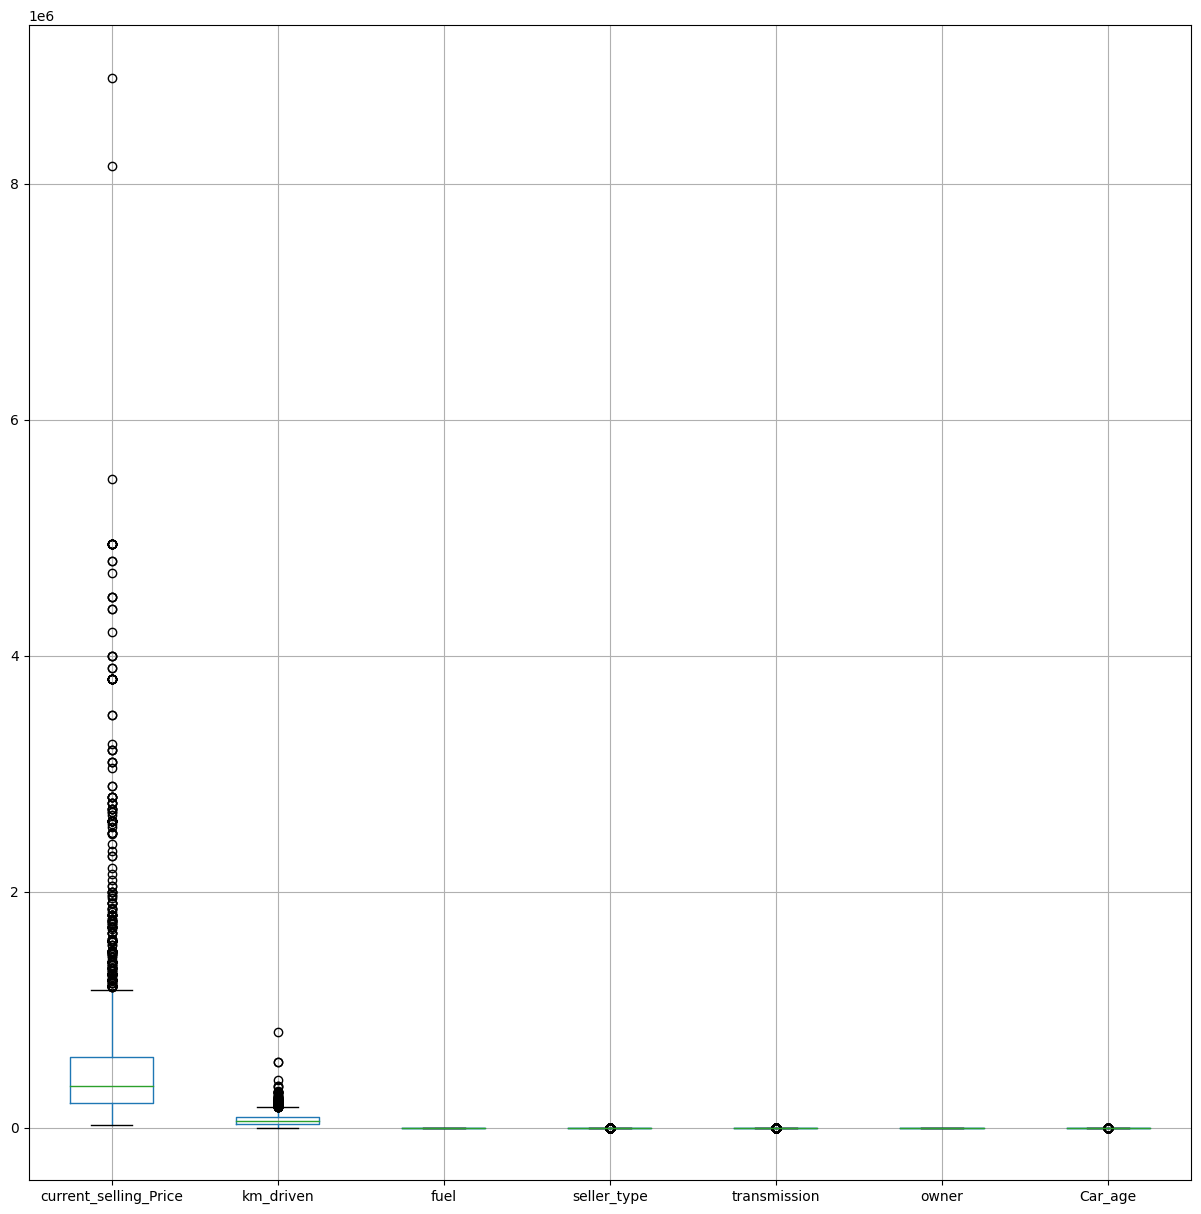

In [ ]:
plt.figure(figsize=(15,15))
A_data.boxplot()

# Machine Learning

1. Select the features and targets

In [ ]:
## Features
X = np.array(A_data.drop('current_selling_Price',axis=1))
## Target
Y = np.array(A_data['current_selling_Price'])

2. Spliting the data

In [ ]:
x_train, x_test , y_train , y_test = train_test_split(X,Y, test_size=0.3)

In [ ]:
len(x_train),len(x_test),len(y_train),len(y_test)

(3038, 1302, 3038, 1302)

3. Choosing the model

In [ ]:
remodel = DecisionTreeRegressor()

4. Training the model

In [ ]:
remodel.fit(x_train, y_train)

DecisionTreeRegressor()

In [ ]:
y_pred = remodel.predict(x_test)

In [ ]:
y_pred

array([463000., 180000., 120000., ..., 600000., 465000., 154000.])

# Testing the model

In [ ]:
target = pd.DataFrame({"Actual_valu":y_test.reshape(-1), "Predicted_valu":y_pred.reshape(-1)})

In [ ]:
target.head()

,Actual_valu,Predicted_valu
0,450000,463000.0
1,180000,180000.0
2,80000,120000.0
3,525000,532500.0
4,950000,415000.0


scatter plot

Text(0.5, 1.0, 'Actual value vs prediction value')

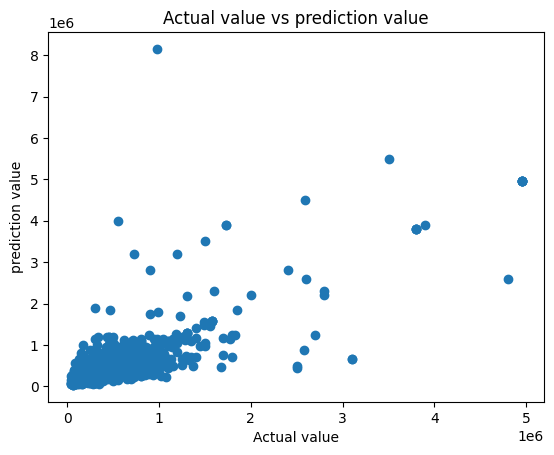

In [ ]:

plt.scatter(y_test,y_pred)
plt.xlabel("Actual value")
plt.ylabel('prediction value')
plt.title('Actual value vs prediction value')

<Axes: >

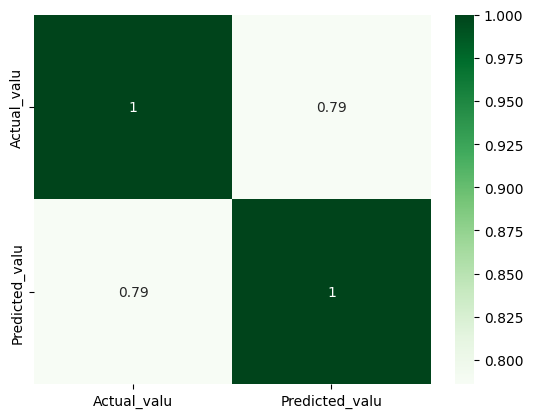

In [ ]:
sns.heatmap(target.corr(), annot=True, cmap='Greens')

# Performance


In [ ]:
r2_score(y_test,y_pred)

0.5100926515527326